Enter asset names (comma-separated): AAPL, GOOG
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Enter weight for AAPL: 0.5
Enter weight for GOOG: 0.5


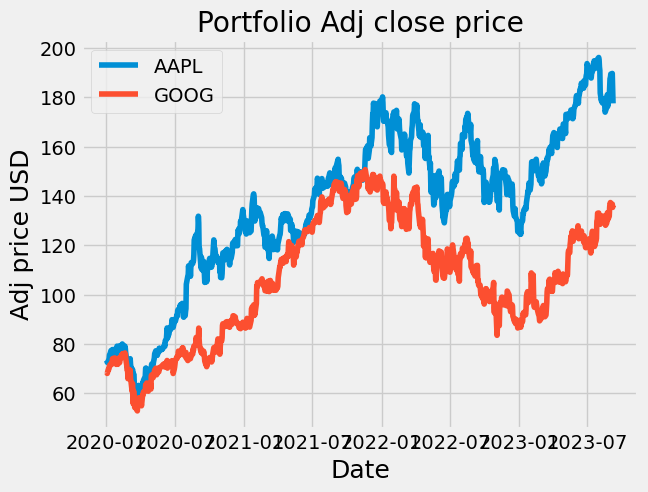

Expected annual return: 27.09%
Annual Volatility / risk: 31.45%%
Annual Variance: 10.0%


In [1]:
#Importing libraries

import numpy as np
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from datetime import datetime


#Taking stocks inputs from user 

assets_input = input("Enter asset names (comma-separated): ")
assets = [asset.strip() for asset in assets_input.split(',')]

df = pd.DataFrame()

for stock in assets:
    df[stock] = yf.download(stock, start="2020-01-01")['Adj Close']
    
    
#Collect weights from the user for each asset
num_assets = len(assets)
weights = []

for i in range(num_assets):
    weight = float(input(f"Enter weight for {assets[i]}: "))
    weights.append(weight)

# Convert the list of weights into a NumPy array
weights = np.array(weights)

# Ensure that the weights sum up to 1 (or 100%)
if not np.isclose(weights.sum(), 1.0):
    print("Warning: The weights do not sum up to 1.0 (or 100%). Adjusting weights...")
    weights = weights / weights.sum()

    
##Visualizing the stocks
title = 'Portfolio Adj close price'

#Get the stocks
my_stocks = df

#Create and plot the graph
for c in my_stocks.columns.values:
    plt.plot(my_stocks[c], label=c)
    
plt.title(title)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Adj price USD', fontsize=18)
plt.legend(my_stocks.columns.values, loc = 'upper left')
plt.show()


##Show the daily simple returns
returns = df.pct_change()
returns

## Create and show the annualized covariance matrix

cov_matrix_annual = returns.cov() * 250
cov_matrix_annual

##Calculate the portfolio variance

port_variance = np.dot( weights.T, np.dot(cov_matrix_annual, weights))
port_variance

##Calculate the portfolio volatility or standard deviation

port_volatility = np.sqrt(port_variance)
port_volatility

#Calculate the annual portfolio return

portfolioSimpleAnnualReturn = np.sum(returns.mean() * weights) * 250
portfolioSimpleAnnualReturn

##Show the expected annual return, volatilty(risk), and variance

percent_var = str(round(port_variance, 2) * 100) + '%'
percent_vols = '{:.2f}%'.format(port_volatility * 100) + '%'
percent_ret = f'{portfolioSimpleAnnualReturn * 100:.2f}%'

print('Expected annual return: '+ percent_ret)
print('Annual Volatility / risk: '+ percent_vols)
print('Annual Variance: '+ percent_var)